In [15]:
options(pkgType = "binary", repos = "https://cran-archive.r-project.org/")

In [133]:
install.packages("hdm")
install.packages("parallel")
install.packages("stats")
install.packages("xtable")
install.packages("glmnet")
install.packages("Matrix")
install.packages("ggplot2")
library(hdm)
library(parallel)
library(stats)
library(xtable)
library(glmnet)
library(Matrix)
library(ggplot2)

Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'hdm' is in use and will not be installed"Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'parallel' is in use and will not be installed"Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'stats' is in use and will not be installed"Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'xtable' is in use and will not be installed"Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'glmnet' is in use and will not be installed"Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'Matrix' is in use and will not be installed"Installing p

# Neyman Orthogonality Proof

To demonstrate why the derivative of 𝛼 with respect to 𝜂 is zero under the Neyman Orthogonality condition, you must show that the objective function's sensitivity to 𝜂 at the true parameter values is minimal. Here’s a simplified approach:

1.	Objective Function: Consider a generic objective function 𝐿(𝛼,𝜂) that you minimize to estimate parameters. Suppose 𝐿 represents a loss function for the model 𝑦=𝛼𝐷+𝑏′𝑊+𝑒.

2.	Gradient with Respect to 𝜂η:
•	Compute the gradient ∇𝜂𝐿(𝛼,𝜂). For Neyman Orthogonality to hold, this gradient evaluated at the true parameter values (𝛼,𝜂0) must be zero, i.e., ∇𝜂𝐿(𝛼,𝜂0)=0.
•	This implies that at the optimum, small changes in 𝜂(nuisance parameters) do not affect the value of the loss function, indicating that the estimation of 𝛼α is stable against changes in 
𝜂.
3.	Second Derivative or Cross-Derivative:
•	Calculate ∂2𝐿/∂𝛼∂𝜂. For the derivative 𝑑𝛼/𝑑𝜂 to be zero, this cross-derivative should also ideally be zero at the optimum.
•	It means that the rate of change of the loss function with respect to 𝛼α does not change as 𝜂 changes slightly, confirming the insensitivity of 𝛼 to 𝜂.
4.	Implicit Function Theorem:
•	The theorem suggests that if 𝐹(𝛼,𝜂)=∇𝜂𝐿(𝛼,𝜂) and ∂𝐹∂𝜂 are well-defined and continuous, then around the true values, the function 𝛼(𝜂) behaves smoothly and does not react to minor perturbations in 𝜂.
5.	Practical Consideration: In practice, you often verify this condition through simulation or empirical testing, especially in complex econometric models where analytical solutions may be infeasible.


# Code section

## Orthogonal Learning

In [3]:
set.seed(1)

B = 100 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=1000
p= 100
beta = 1/(1:p)^2
gamma = 1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y = 10*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)!= 0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$residuals
resD = rlasso(D~ X, Post=F)$residuals
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

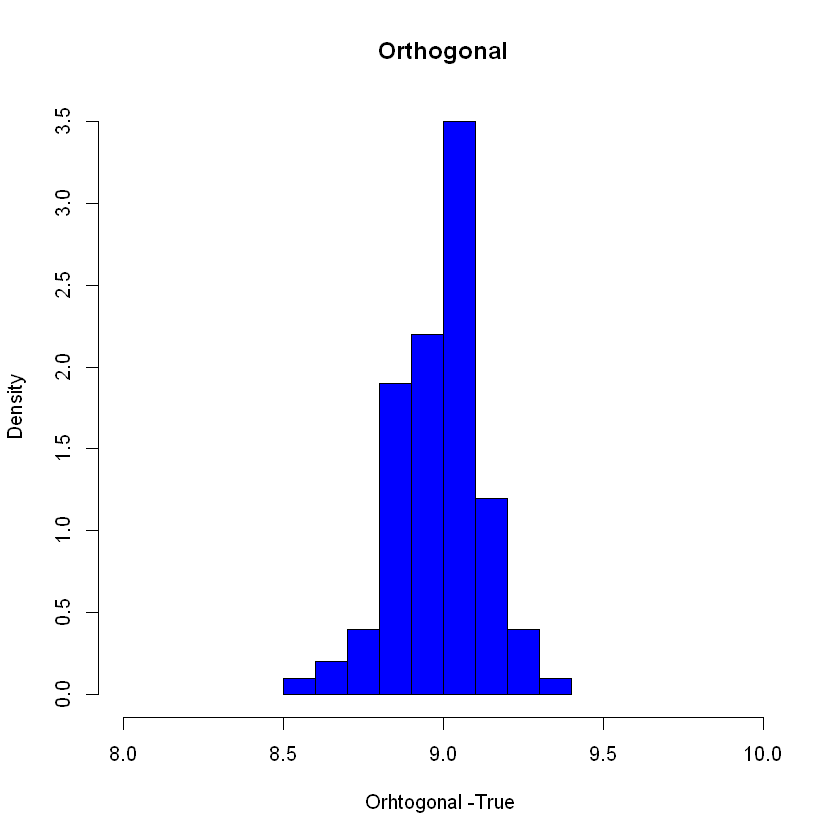

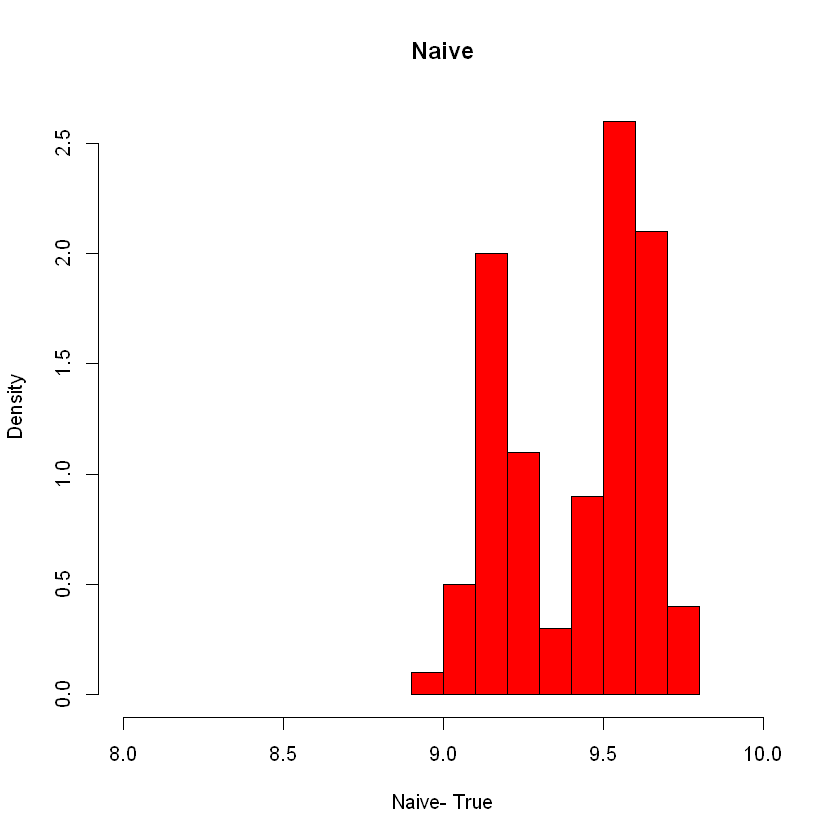

In [4]:
hist(Orthogonal-1,col=4, freq=F, xlim= c(8, 10), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-1, col=2, freq=F, xlim= c(8,10), xlab= "Naive- True", main = "Naive")

In [5]:
set.seed(1)

B = 1000 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=1000
p= 100
beta = 1/(1:p)^2
gamma = 1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y = 10*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)!= 0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$residuals
resD = rlasso(D~ X, Post=F)$residuals
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

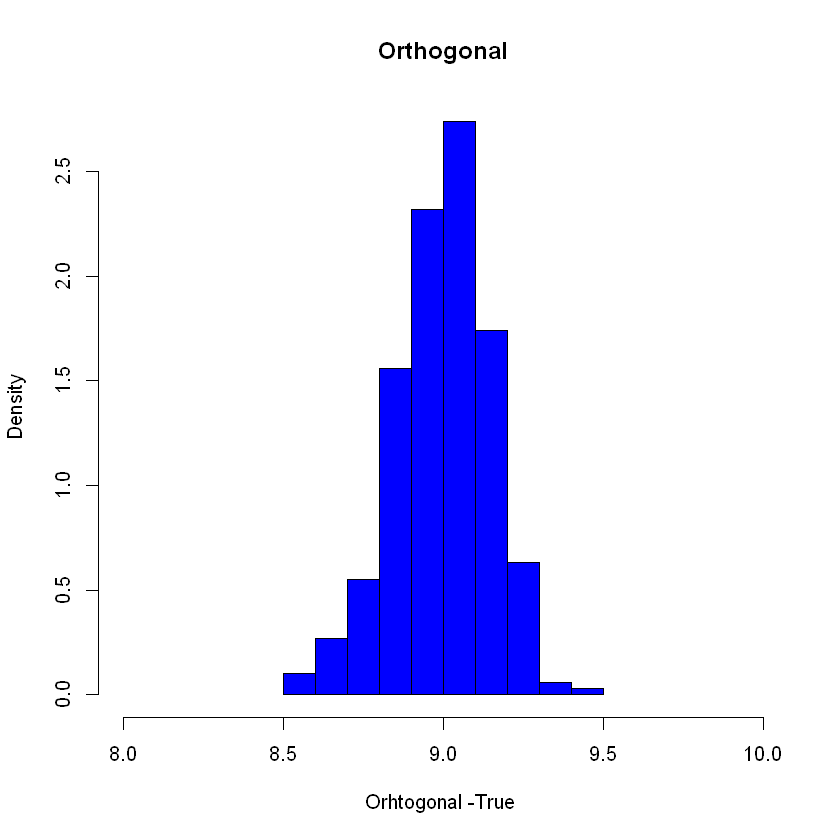

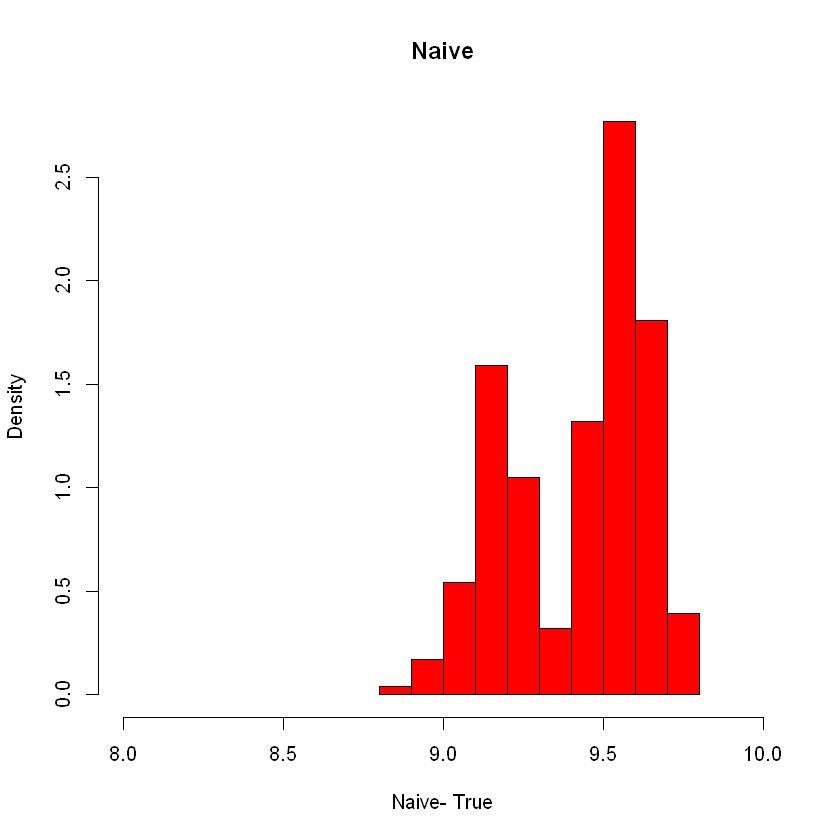

In [6]:
hist(Orthogonal-1,col=4, freq=F, xlim= c(8, 10), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-1, col=2, freq=F, xlim= c(8,10), xlab= "Naive- True", main = "Naive")

In [7]:
set.seed(1)

B = 10000 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=1000
p= 100
beta = 1/(1:p)^2
gamma = 1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y = 10*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)!= 0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$residuals
resD = rlasso(D~ X, Post=F)$residuals
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

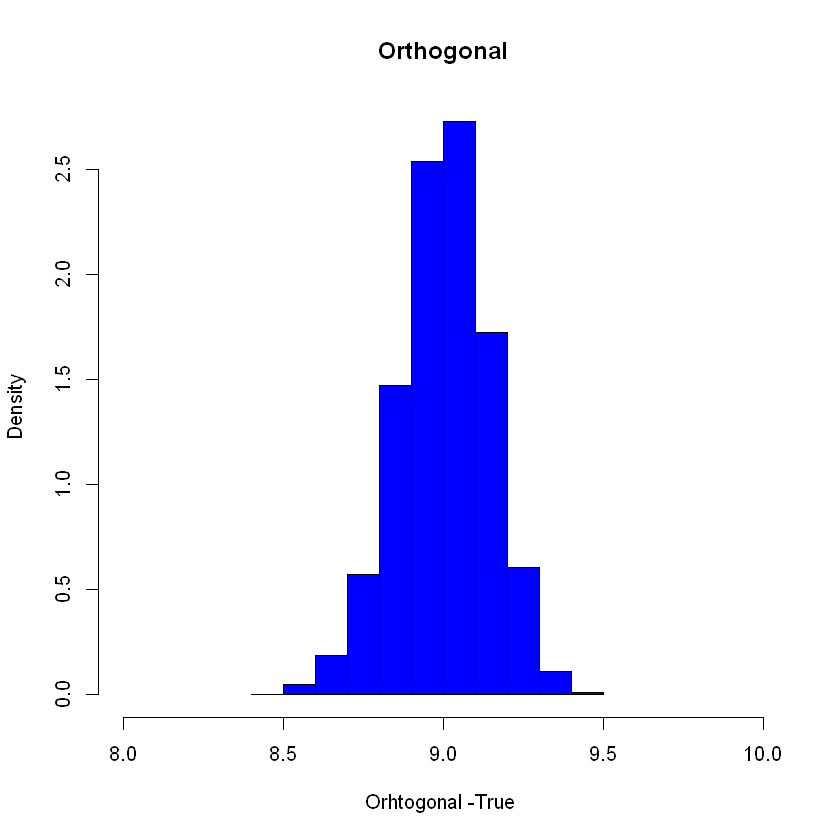

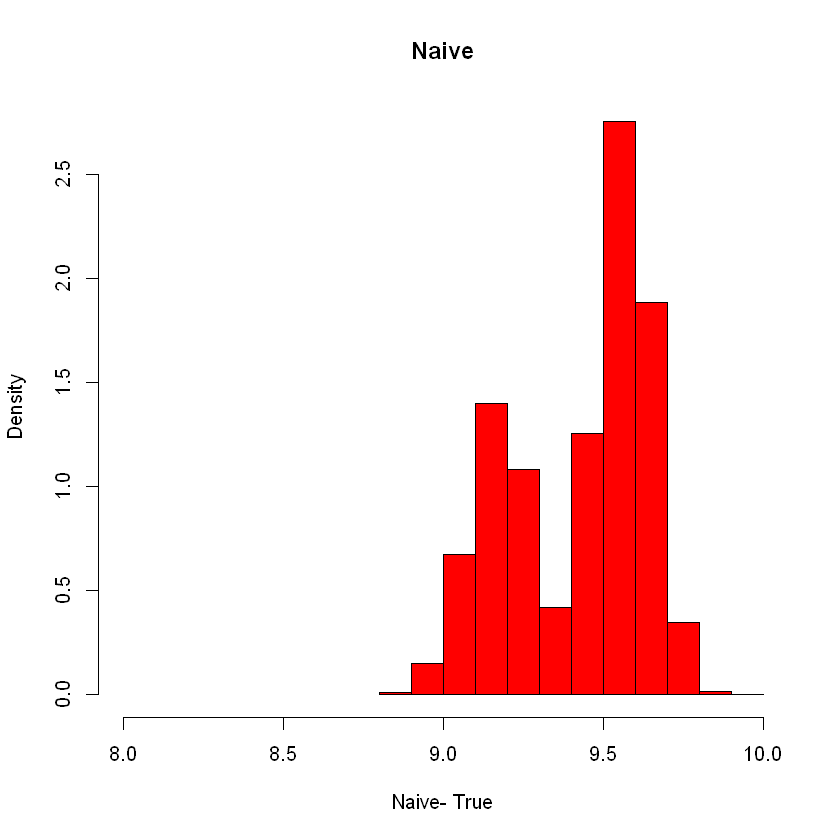

In [8]:
hist(Orthogonal-1,col=4, freq=F, xlim= c(8, 10), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-1, col=2, freq=F, xlim= c(8,10), xlab= "Naive- True", main = "Naive")

The naive estimator might be biased if there's correlation between the treatment D and the covariates X that isn't accounted for, causing the estimator to be centered away from the true effect (10 in this case).


The orthogonal estimator, which corrects for this by removing the influence of X on D, should be centered closer to the trueeffect of 10.
ct of 10.

Bias in Naive Estimators: Naive estimators do not account for the confounding effects that covariates X might have on the treatment D. When X and D are correlated, and X also affects Y, failing to control for X can lead to biased estimates of the treatment effect.

Orthogonality: Orthogonal methods explicitly correct for these correlations by, for instance, using control functions or residuals from regressions of D on X. This approach effectively isolates the component of D that is independent of X, leading to more accurate (unbiased) estimation of the treatment effect.


In [6]:
set.seed(1)

B <- 10000 # trials

# Crear una función para cada iteración que se ejecutará en paralelo
perform_trial <- function(i) {
  n <- 1000
  p <- 100
  beta <- 1/(1:p)^2
  gamma <- 1/(1:p)^2

  X <- matrix(rnorm(n * p), n, p)
  D <- X %*% gamma + rnorm(n) / 4
  Y <- 10 * D + X %*% beta + rnorm(n)

  # single selection method
  SX.IDs <- which(rlasso(Y ~ D + X)$coef[-c(1, 2)] != 0)  # select covariates by Lasso

  naive_result <- if (sum(SX.IDs) == 0) {
    lm(Y ~ D)$coef[2]
  } else {
    lm(Y ~ D + X[, SX.IDs])$coef[2]
  }

  # partialling out
  resY <- rlasso(Y ~ X, Post = FALSE)$residuals
  resD <- rlasso(D ~ X, Post = FALSE)$residuals
  orthogonal_result <- lm(resY ~ resD)$coef[2]

  return(c(naive_result, orthogonal_result))
}

# Ejecutar en paralelo
results <- mclapply(1:B, perform_trial, mc.cores = detectCores())

# Separar resultados
Naive <- sapply(results, function(x) x[1])
Orthogonal <- sapply(results, function(x) x[2])

# Gráficos
par(mfrow = c(1, 2))
hist(Orthogonal - 1, col = 4, freq = FALSE, xlim = c(8, 10), xlab = "Orthogonal - True", main = "Orthogonal")
hist(Naive - 1, col = 2, freq = FALSE, xlim = c(8, 10), xlab = "Naive - True", main = "Naive")


ERROR: Error in mclapply(1:B, perform_trial, mc.cores = detectCores()): 'mc.cores' > 1 is not supported on Windows


Parallel computing involves splitting a large computation task into smaller chunks and processing these chunks simultaneously across multiple cores or machines. This significantly reduces the overall computation time.

## Double Lasso - Using School data

In [107]:
data <- read.csv("https://raw.githubusercontent.com/gsbDBI/ExperimentData/97a11199ba559f01c7b3803a1493ffa08631732e/School/bruhn2016.csv")
data <- na.omit(data)
head(data)

,outcome.test.score,treatment,school,is.female,mother.attended.secondary.school,father.attened.secondary.school,failed.at.least.one.school.year,family.receives.cash.transfer,has.computer.with.internet.at.home,is.unemployed,has.some.form.of.income,saves.money.for.future.purchases,intention.to.save.index,makes.list.of.expenses.every.month,negotiates.prices.or.payment.methods,financial.autonomy.index
3,56.67166,1,35002914,1,1,1,0,0,0,1,0,0,48,0,1,56
4,29.07938,0,35908915,1,0,0,0,0,0,0,0,0,42,0,0,27
5,49.56353,1,33047324,1,0,0,0,0,1,0,1,0,50,0,1,31
6,43.09943,0,53012542,1,0,0,0,1,1,0,1,0,93,0,1,77
7,71.32960,0,53006984,1,1,0,0,0,1,1,1,0,52,0,1,43
8,80.06344,0,33049475,1,1,1,0,0,0,0,1,0,50,0,0,31


In [101]:
# Assuming 'outcome.test.score' as the dependent variable
y <- data$outcome.test.score

# Use all other columns as independent variables, excluding the first column which typically is the index or ID
X <- data[,c(-1)]

# Convert X back to a data frame if necessary
X <- as.data.frame(X)

### OLS

In [111]:
ols_model <- lm(y ~ ., data = data.frame(y, X))
summary(ols_model)
coef_ols <- coef(summary(ols_model))
treatment_ols_coef <- coef_ols["treatment", "Estimate"]
treatment_ols_ci_lower <- treatment_ols_coef - 1.96 * coef_ols["treatment", "Std. Error"]
treatment_ols_ci_upper <- treatment_ols_coef + 1.96 * coef_ols["treatment", "Std. Error"]


Call:
lm(formula = y ~ ., data = data.frame(y, X))

Residuals:
    Min      1Q  Median      3Q     Max 
-41.331  -9.411   0.421   9.595  45.906 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           5.191e+01  7.872e-01  65.938  < 2e-16 ***
treatment                             4.291e+00  2.457e-01  17.459  < 2e-16 ***
school                               -5.430e-08  1.623e-08  -3.345 0.000826 ***
is.female                             2.665e+00  2.541e-01  10.488  < 2e-16 ***
mother.attended.secondary.school      6.849e-01  2.867e-01   2.389 0.016927 *  
father.attened.secondary.school       7.407e-01  2.898e-01   2.556 0.010601 *  
failed.at.least.one.school.year      -5.858e+00  2.827e-01 -20.725  < 2e-16 ***
family.receives.cash.transfer        -1.581e+00  2.761e-01  -5.725 1.06e-08 ***
has.computer.with.internet.at.home   -2.147e-01  2.747e-01  -0.782 0.434381    
is.unemployed                        -2

[1] 4.290505


### # LASSO with Cross-Validation

16 x 1 sparse Matrix of class "dgCMatrix"
                                                1
(Intercept)                          51.580049098
treatment                             3.450238901
school                                .          
is.female                             1.816285090
mother.attended.secondary.school      0.348906212
father.attened.secondary.school       0.329933628
failed.at.least.one.school.year      -5.311870532
family.receives.cash.transfer        -0.885799907
has.computer.with.internet.at.home    .          
is.unemployed                        -0.960042049
has.some.form.of.income               0.845856279
saves.money.for.future.purchases      .          
intention.to.save.index               0.143782502
makes.list.of.expenses.every.month   -0.599940992
negotiates.prices.or.payment.methods  .          
financial.autonomy.index             -0.008364978


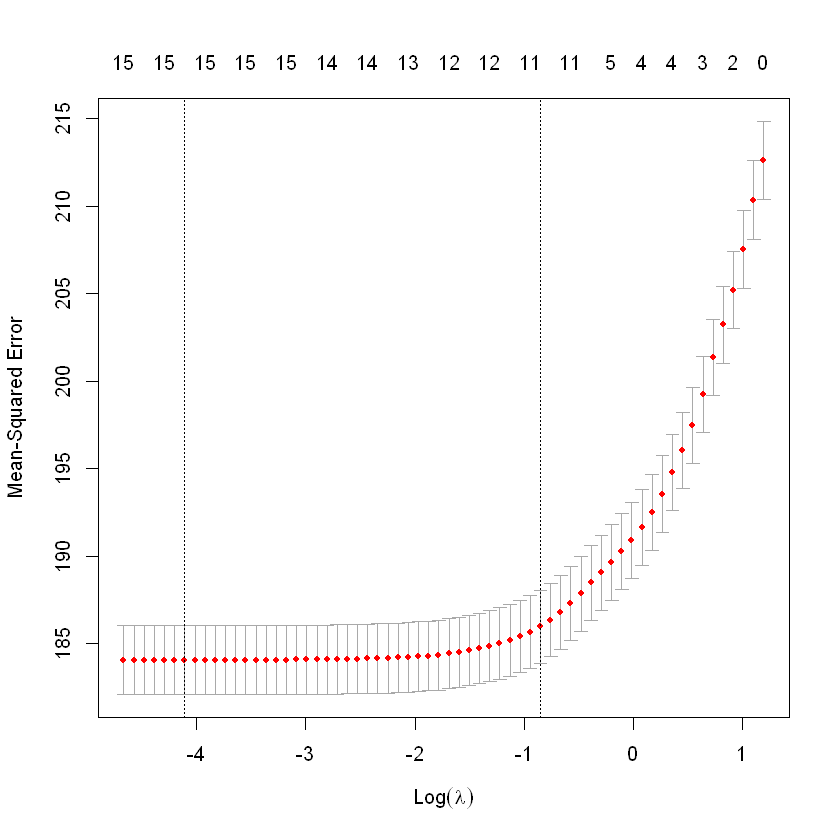

In [126]:
cv_lasso <- cv.glmnet(as.matrix(X), y, alpha = 1)
plot(cv_lasso)
best_lambda <- cv_lasso$lambda.min
lasso_model <- glmnet(as.matrix(X), y, alpha = 1, lambda = best_lambda)
lasso_coef <- as.numeric(coef(cv_lasso, s = "lambda.min")[2])
print(coef(cv_lasso))

### Double Lasso using theoretical Lambda

In [140]:
dl_theoretical <- rlasso(X, y, method = "theoretical")
summary(dl_theoretical)
theoretical_coef <- as.numeric(coef(dl_theoretical)[2])


Call:
rlasso.default(x = X, y = y, method = "theoretical")

Post-Lasso Estimation:  TRUE 

Total number of variables: 15
Number of selected variables: 11 

Residuals: 
     Min       1Q   Median       3Q      Max 
-41.0993  -9.4591   0.4401   9.5797  45.6421 

                                     Estimate
(Intercept)                            50.179
treatment                               4.280
school                                  0.000
is.female                               2.634
mother.attended.secondary.school        0.743
father.attened.secondary.school         0.709
failed.at.least.one.school.year        -5.870
family.receives.cash.transfer          -1.466
has.computer.with.internet.at.home      0.000
is.unemployed                          -2.127
has.some.form.of.income                 2.200
saves.money.for.future.purchases        0.000
intention.to.save.index                 0.172
makes.list.of.expenses.every.month     -1.757
negotiates.prices.or.payment.methods    0.000
fi

### Double Lasso using method="partialling out"

In [139]:
dl_partial <- rlassoEffects(X,y, method = "partialling out")
summary(dl_partial)
treatment_partial_coef <- dl_partial$coef[2, "estimates"]
print(dl_partial)

[1] "Estimates and significance testing of the effect of target variables"
                                      Estimate. Std. Error t value Pr(>|t|)    
treatment                             4.270e+00  2.454e-01  17.400  < 2e-16 ***
school                               -5.408e-08  1.619e-08  -3.340 0.000837 ***
is.female                             2.650e+00  2.538e-01  10.441  < 2e-16 ***
mother.attended.secondary.school      7.389e-01  2.860e-01   2.584 0.009765 ** 
father.attened.secondary.school       7.030e-01  2.892e-01   2.431 0.015063 *  
failed.at.least.one.school.year      -5.857e+00  2.824e-01 -20.741  < 2e-16 ***
family.receives.cash.transfer        -1.458e+00  2.738e-01  -5.326 1.01e-07 ***
has.computer.with.internet.at.home   -1.934e-02  2.682e-01  -0.072 0.942530    
is.unemployed                        -2.138e+00  2.936e-01  -7.282 3.29e-13 ***
has.some.form.of.income               2.200e+00  2.822e-01   7.796 6.40e-15 ***
saves.money.for.future.purchases     -1.224e-


Call:
rlassoEffects.default(x = X, y = y, method = "partialling out")

Coefficients:
                           treatment                                school  
                           4.270e+00                            -5.408e-08  
                           is.female      mother.attended.secondary.school  
                           2.650e+00                             7.389e-01  
     father.attened.secondary.school       failed.at.least.one.school.year  
                           7.030e-01                            -5.857e+00  
       family.receives.cash.transfer    has.computer.with.internet.at.home  
                          -1.458e+00                            -1.934e-02  
                       is.unemployed               has.some.form.of.income  
                          -2.138e+00                             2.200e+00  
    saves.money.for.future.purchases               intention.to.save.index  
                          -1.224e-01                             1.

In [124]:
# Now we simply replace OLS with Lasso to implement the Double Lasso process

double_lasso <- function(y, D, W) {
  # residualize outcome with Lasso
  yfit.rlasso <- rlasso(W,y, post=FALSE)
  yhat.rlasso <- predict(yfit.rlasso, as.data.frame(W))
  yres <- y - as.numeric(yhat.rlasso)


  # residualize treatment with Lasso
  Dfit.rlasso <- rlasso(W,D, post=FALSE)
  Dhat.rlasso <- predict(Dfit.rlasso, as.data.frame(W))
  Dres <- D - as.numeric(Dhat.rlasso)

  # rest is the same as in the OLS case
  hat <- mean(yres * Dres) / mean(Dres^2)
  epsilon <- yres - hat * Dres
  V <- mean(epsilon^2 * Dres^2) / mean(Dres^2)^2
  stderr = sqrt(V / length(y))

  return(list(hat = hat, stderr = stderr))
}

double_lasso(y, data[,2], data[,c(-1,-2)])

treatment_dlpo_coef <- double_lasso(y, data[,2], data[,c(-1,-2)])$hat
treatment_dlpo_ci_lower <- treatment_dlpo_coef - 1.96 * double_lasso(y, data[,2], data[,c(-1,-2)])$stderr
treatment_dlpo_ci_upper <- treatment_dlpo_coef + 1.96 * double_lasso(y, data[,2], data[,c(-1,-2)])$stderr

$hat
[1] 4.287544

$stderr
[1] 0.2460686

                         Model Coefficient    Lower    Upper
1                          OLS    4.290505 3.808836 4.772174
2                     Lasso CV    4.258078       NA       NA
3     Double Lasso Theoretical    4.280101       NA       NA
4 Double Lasso Partialling Out    4.287544 3.805249 4.769838


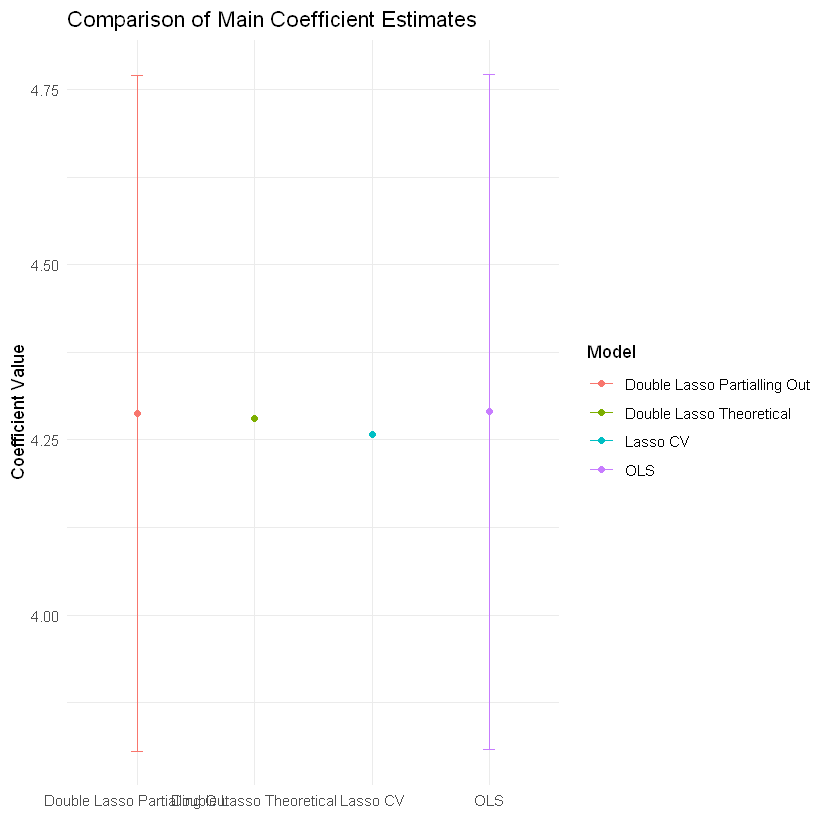

In [130]:
# Create a dataframe for plotting
plot_data <- data.frame(
  Model = c("OLS", "Lasso CV", "Double Lasso Theoretical","Double Lasso Partialling Out"),
  Coefficient = c(treatment_ols_coef, lasso_coef, theoretical_coef, treatment_dlpo_coef),
  Lower = c(treatment_ols_ci_lower, NA, NA, treatment_dlpo_ci_lower),
  Upper = c(treatment_ols_ci_upper, NA, NA,treatment_dlpo_ci_upper)
)
print(plot_data)

# Plot using ggplot2
ggplot(plot_data, aes(x = Model, y = Coefficient, color = Model)) +
  geom_point() +
  geom_errorbar(aes(ymin = Lower, ymax = Upper), width = 0.1) +
  theme_minimal() +
  labs(title = "Comparison of Main Coefficient Estimates",
       y = "Coefficient Value",
       x = "")
